In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df= pd.read_csv('c:\\Users\\OLOLA\\OneDrive\\Desktop\\data sci\\code alpha\\may-june internship\\Advertising.csv')
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [28]:
df.shape

(200, 5)

In [29]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [30]:
df.drop_duplicates()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [31]:
ads= df.drop(columns='Unnamed: 0', axis=1)

In [32]:
ads

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [33]:
ads.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [34]:
ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [35]:
ads.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


EDA

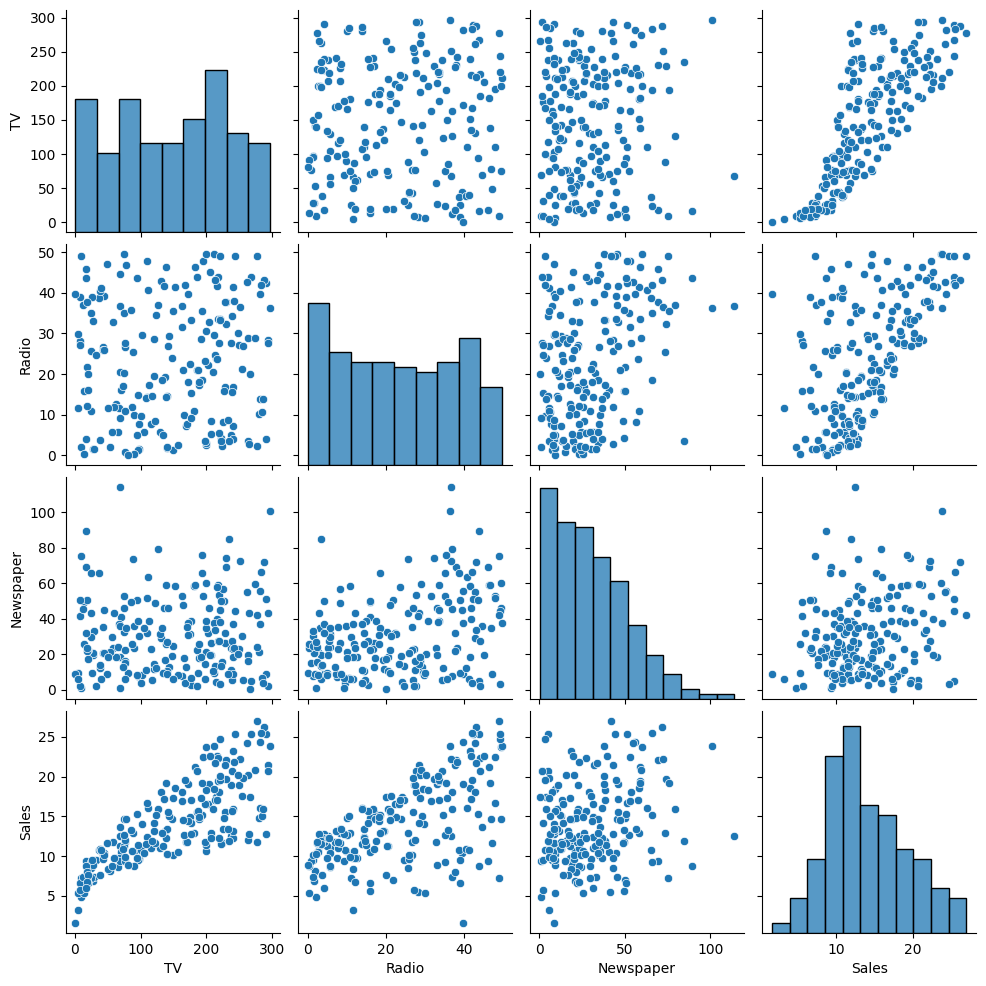

In [36]:
# pairplot to visualize the relationship
sns.pairplot(ads, )

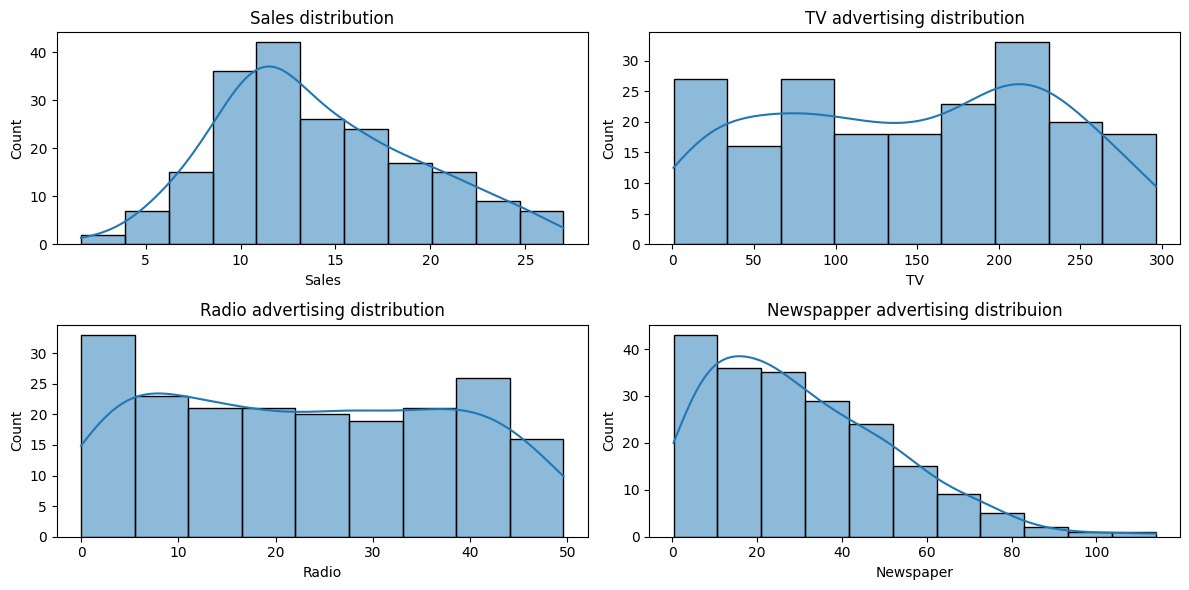

In [37]:
#plot distribution
plt.figure(figsize=(12,6))

# sales distribution
plt.subplot(2,2,1)
sns.histplot(ads['Sales'], kde=True)
plt.title('Sales distribution')

# TV advertising distribution
plt.subplot(2,2,2)
sns.histplot(ads['TV'],kde=True)
plt.title('TV advertising distribution')

# Radio advertising distribution
plt.subplot(2,2,3)
sns.histplot(ads['Radio'],kde=True)
plt.title('Radio advertising distribution')

# Newspapper advertising distribuion
plt.subplot(2,2,4)
sns.histplot(ads['Newspaper'],kde= True)
plt.title('Newspapper advertising distribuion')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'correlation matrix')

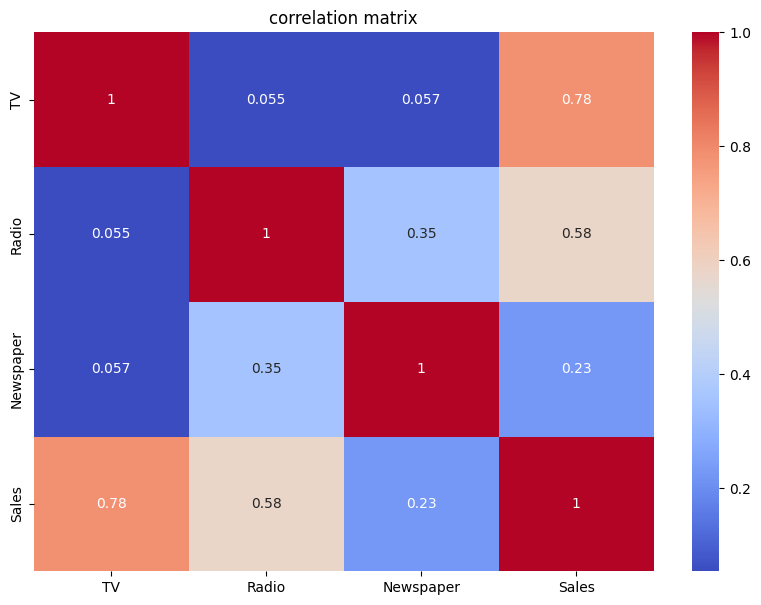

In [38]:
# correlation matrix
corr_matrix= ads.corr()

#heatmap
plt.figure(figsize=(10,7))
sns.heatmap(corr_matrix,annot= True,cmap='coolwarm')
plt.title('correlation matrix')

correlation value:
tv and sales 0.78 (very strong postive correlation)
radio and sales 0.58 ( strong postive correlation)
newspaper and sales 0.23 ( weak postive correlation)

regression analysis

In [39]:
# feature and target variable
y= ads['Sales']
X= ads.drop(columns=['Sales'])

In [40]:
#train model and data spliting

from sklearn.model_selection import train_test_split

#train model
X_train, X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
#modelling
model= LinearRegression()
# train model
model.fit(X_train,y_train)

LinearRegression()

In [43]:
# prediction
y_predic= model.predict(X_test)
y_predic

array([16.4080242 , 20.88988209, 21.55384318, 10.60850256, 22.11237326,
       13.10559172, 21.05719192,  7.46101034, 13.60634581, 15.15506967,
        9.04831992,  6.65328312, 14.34554487,  8.90349333,  9.68959028,
       12.16494386,  8.73628397, 16.26507258, 10.27759582, 18.83109103,
       19.56036653, 13.25103464, 12.33620695, 21.30695132,  7.82740305,
        5.80957448, 20.75753231, 11.98138077,  9.18349576,  8.5066991 ,
       12.46646769, 10.00337695, 21.3876709 , 12.24966368, 18.26661538,
       20.13766267, 14.05514005, 20.85411186, 11.0174441 ,  4.56899622])

In [44]:
# matrics Evaluation
from sklearn.metrics import mean_squared_error, r2_score
mse= mean_squared_error(y_test,y_predic)
r2= r2_score(y_test,y_predic)

print(f'mse:{mse:2f}')
print(f'R2 Score:{r2:2f}')

mse:3.174097
R2 Score:0.899438


In [45]:
coefficient= pd.DataFrame(model.coef_,X.columns,columns=['coefficient'])
coefficient

,coefficient
TV,0.044730
Radio,0.189195
Newspaper,0.002761


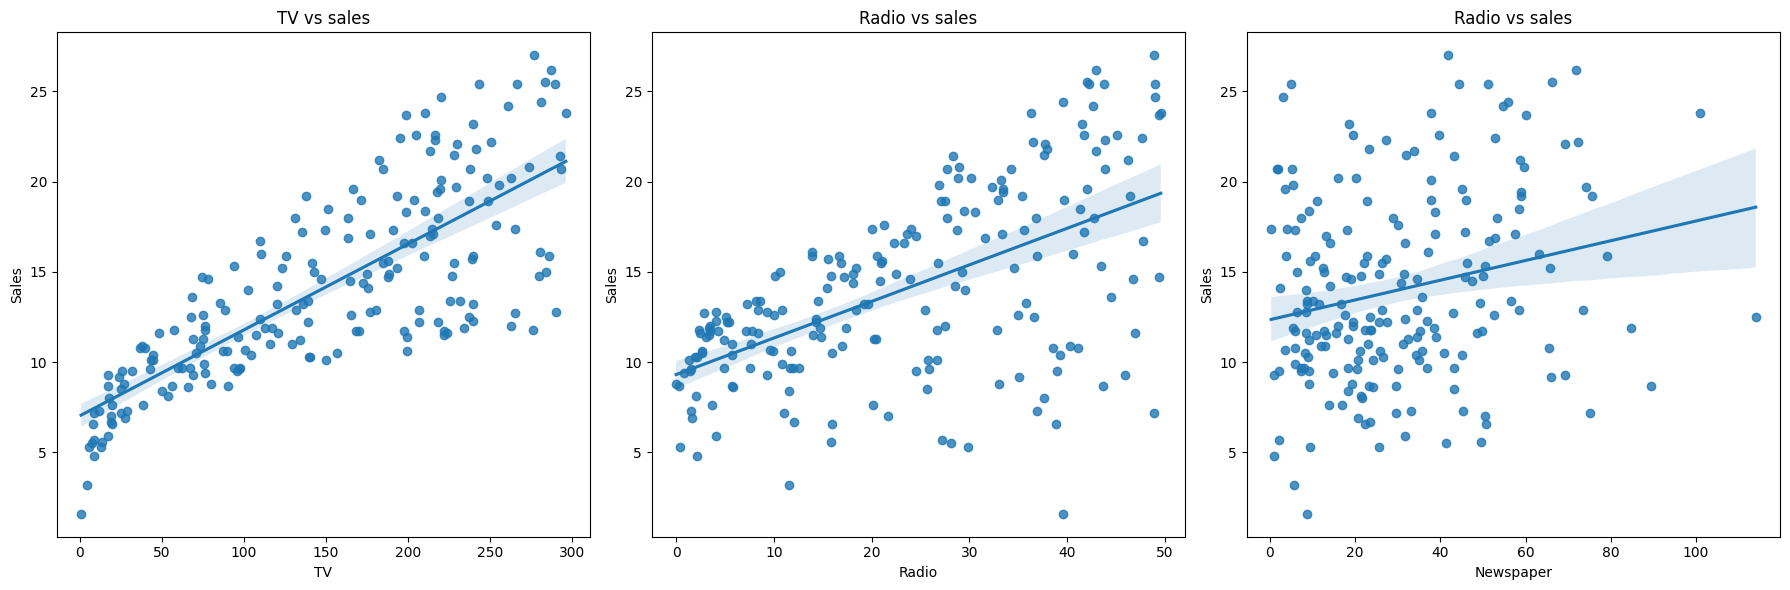

In [46]:
# satter plot with regression line
fig, axes= plt.subplots(1,3, figsize=(18,6))

sns.regplot(x='TV',y='Sales',data=ads,ax=axes[0])
axes[0].set_title('TV vs sales')

sns.regplot(x='Radio',y='Sales',data=ads,ax=axes[1])
axes[1].set_title('Radio vs sales')

sns.regplot(x='Newspaper',y='Sales',data=ads,ax=axes[2])
axes[2].set_title('Radio vs sales')

plt.tight_layout()
plt.show()